In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [74]:
olympics = pd.read_csv('/kaggle/input/olympics2024medalist/olympics2024.csv')

In [75]:
olympics.head()

,Rank,Country,Country Code,Continent,Gold,Silver,Bronze,Total
0,1.0,United States,US,North America,40,44,42,126
1,2.0,China,CHN,Asia,40,27,24,91
2,3.0,Japan,JPN,Asia,20,12,13,45
3,4.0,Australia,AUS,Australia/Oceania,18,19,16,53
4,5.0,France,FRA,Europe,16,26,22,64


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
count = olympics[['Gold', 'Silver', 'Bronze']].sum()

# **Task1: List of medals with their numbers**
NB: We would notice some discrepancies, it might be as a result of ties in some medals or probably disqualification

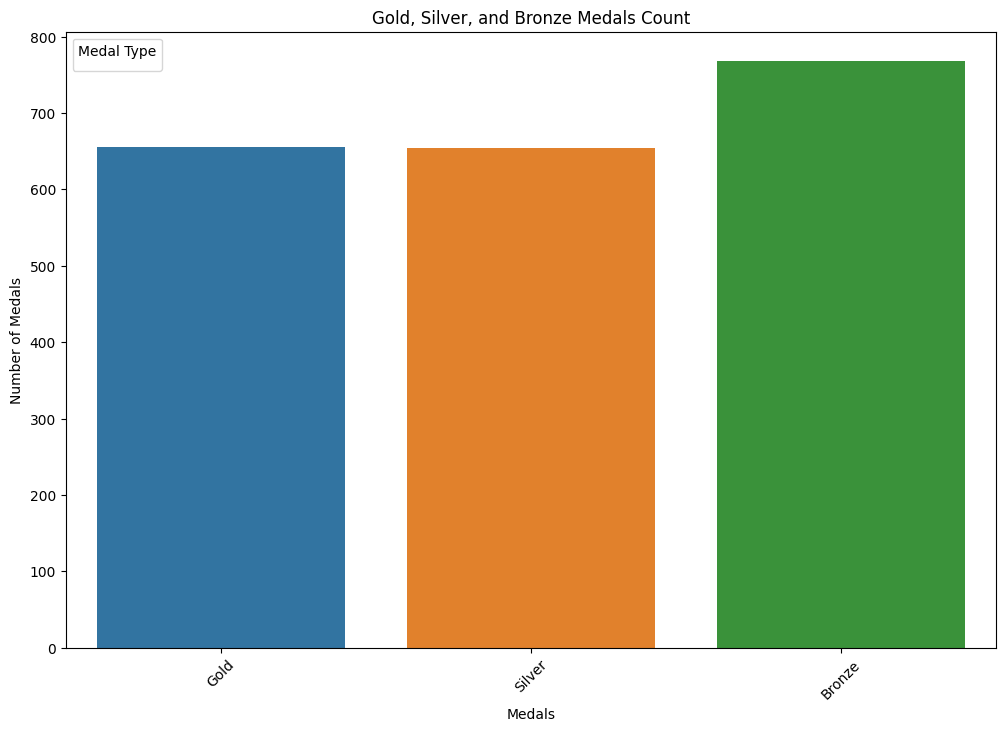

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x=count.index, y=count.values)

plt.title('Gold, Silver, and Bronze Medals Count')
plt.xlabel('Medals')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.show()

# **Task2: Countries with a gold medal**

It can be seen that USA and China had more gold medal with a combined gold of 80 totalling 24% of the entire gold medal of 328

In [80]:
only_gold = olympics[olympics['Gold']>0]

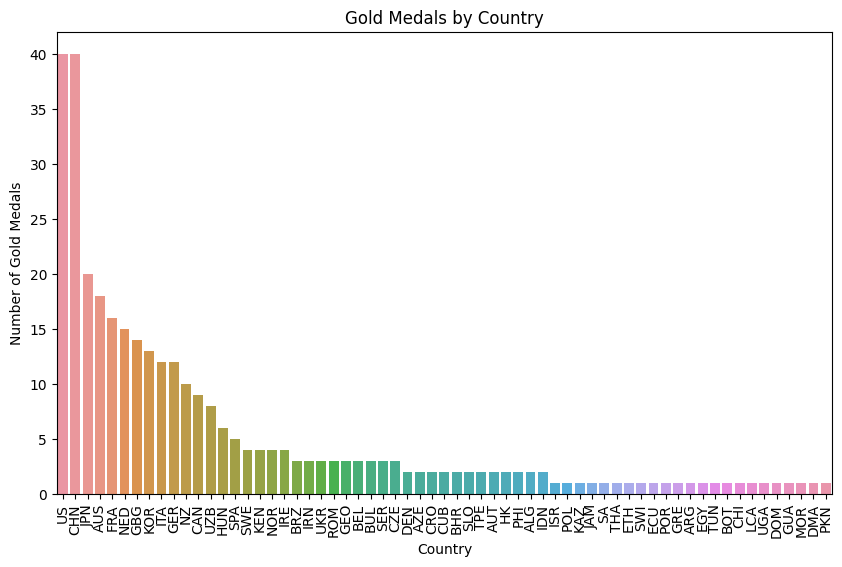

In [81]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y="Gold", data=only_gold)

plt.title('Gold Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.show()

# **Task 3:Countries with Silver Medal**

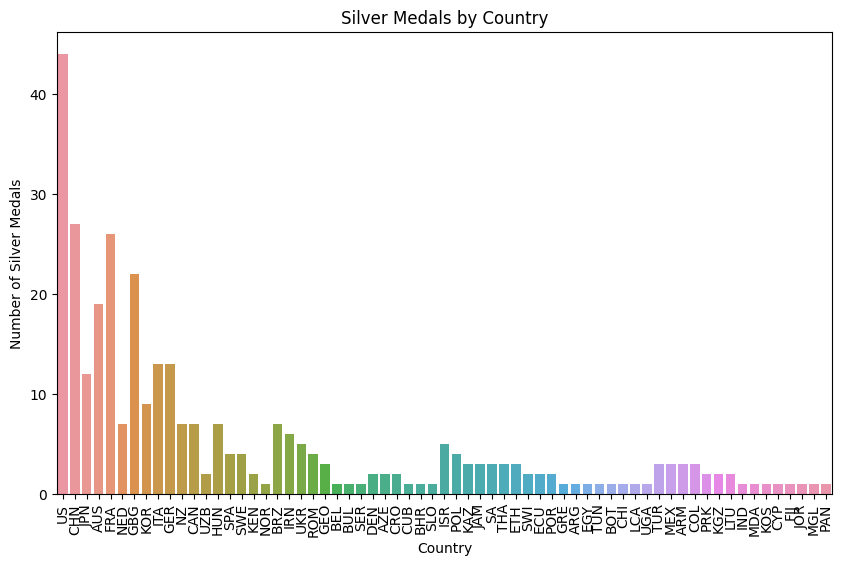

In [82]:
only_silver = olympics[olympics['Silver']>0]
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y="Silver", data=only_silver)

plt.title('Silver Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals')
plt.xticks(rotation=90)
plt.show()

In [83]:
print(f"There are {only_gold.shape[0]} number of countries that has gold")
print(f"There are {only_silver.shape[0]} number of countries that has silver")
print(f"There are {only_bronze.shape[0]} number of countries that has bronze")

There are 64 number of countries that has gold
There are 66 number of countries that has silver
There are 79 number of countries that has bronze


It would be notice that the USA had a clear distance than others, closely followed by China
the top 10 silver medalist had a combined 54% of the silver medal.

# **Task 4:Countries with Bronze Medal**

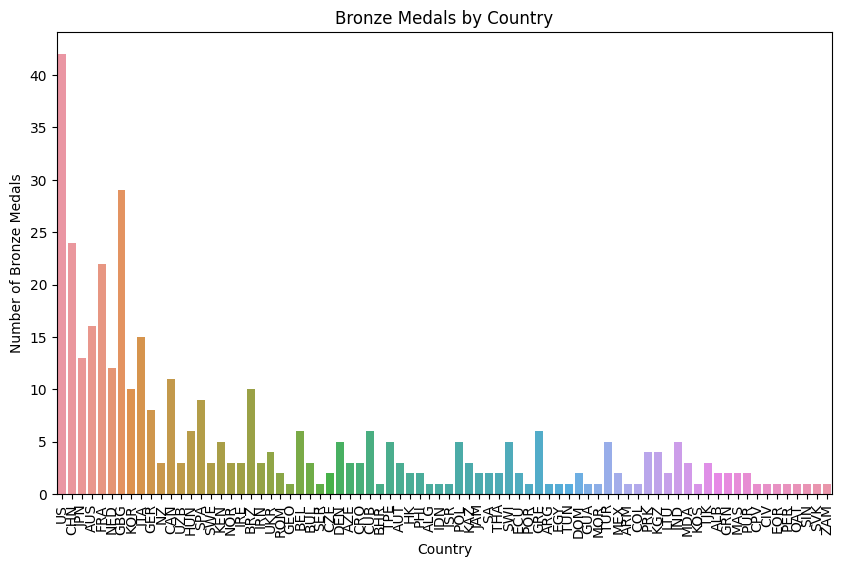

In [101]:
only_bronze = olympics[olympics['Bronze']>0]
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y="Bronze", data=only_bronze)

plt.title('Bronze Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals')
plt.xticks(rotation=90)
plt.show()

The top 10 countries had combined bronze medals almost half of the entire gold, as we can see US and GBR had more bronze medals.

#  **Task 5:Medals by continent**

In [86]:
continent=olympics.Continent.value_counts()
continent

Continent
Europe                    41
Asia                      17
Africa                    12
North America              9
South America              8
Australia/Oceania          3
No Continent (Refugee)     1
Name: count, dtype: int64

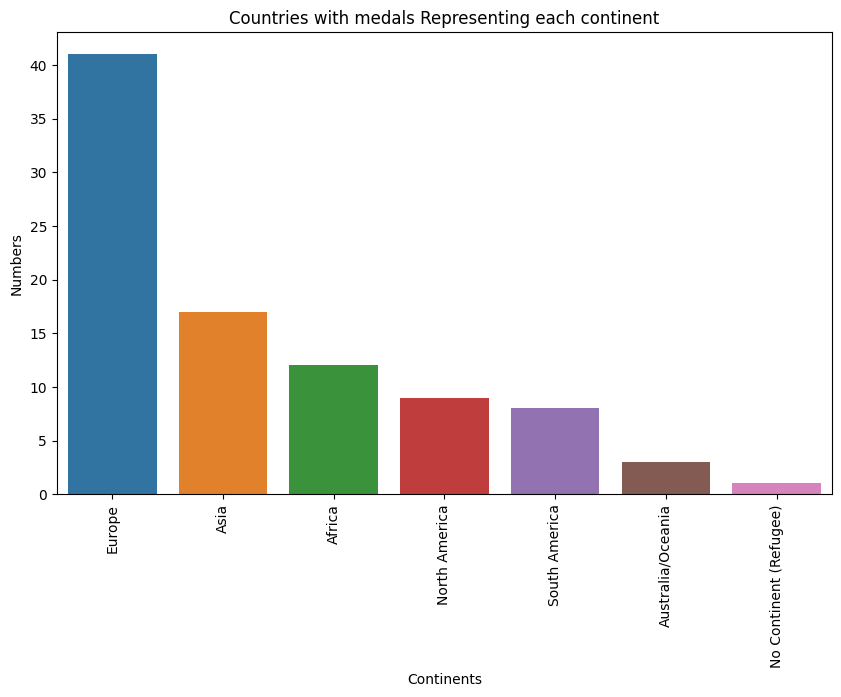

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=continent.index, y=continent.values)

plt.title('Countries with medals Representing each continent')
plt.xlabel('Continents')
plt.ylabel('Numbers')
plt.xticks(rotation=90)
plt.show()

If you can see from the above diagram more countries that won medals came from the European continent with 45% of the countries from there.
NB:There's a particular country not represented but took a medal, called Refugees

In [95]:
continent_medals = olympics.groupby('Continent')[['Gold', 'Silver', 'Bronze']].sum().sort_values(by="Gold", ascending=False)
continent_medals

,Gold,Silver,Bronze
Continent,,,
Europe,137,152,191
Asia,88,62,76
North America,56,59,66
Australia/Oceania,28,27,19
Africa,13,12,14
South America,6,15,17
No Continent (Refugee),0,0,1


In [112]:
continent_total_medals = olympics.groupby('Continent')[['Total']].sum().sort_values(by="Total",ascending=False)
continent_total_series = continent_total_medals['Total']

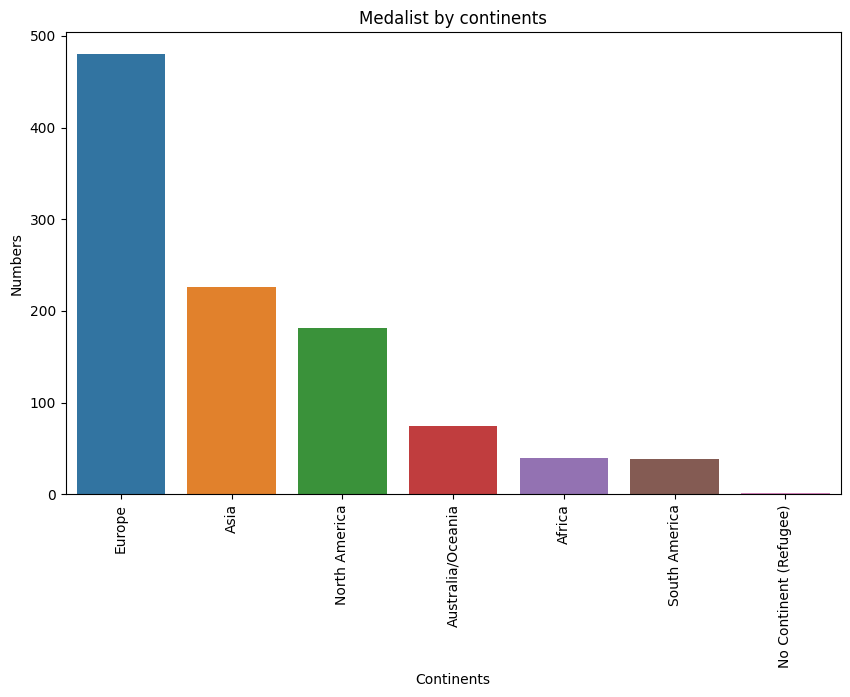

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_total_series.index, y=continent_total_series.values)

plt.title('Medalist by continents')
plt.xlabel('Continents')
plt.ylabel('Numbers')
plt.xticks(rotation=90)
plt.show()

#   **Task 6:Correlation among the medals**

<Axes: >

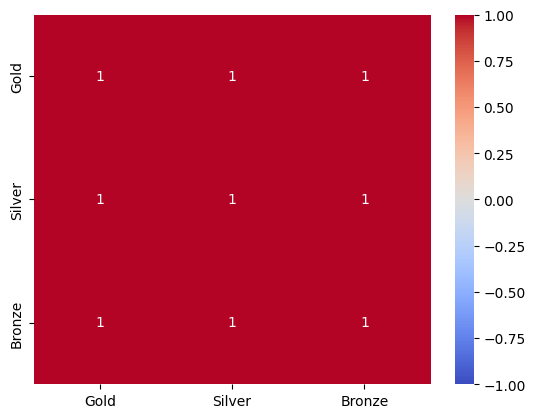

In [119]:
corr_mat = olympics[['Gold','Silver','Bronze']].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)